SIMPLE LINEAR REGRESSION FROM SCRATCH

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math 

In [2]:
data = {
    'x' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y' : [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
}

df = pd.DataFrame(data)
df

,x,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


In [3]:
# if in case the data is in a csv file, above operations can also be done as:
# df= pd.read_csv('data.csv')
# df

In [4]:
df.head()

,x,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7


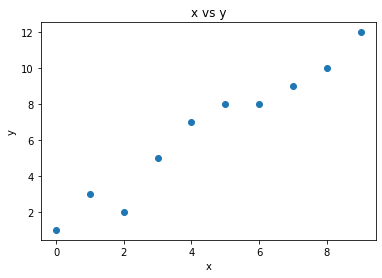

In [5]:
plt.scatter(df.x, df.y)
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
def linear_regression(df):
    x = df.x
    y = df.y     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}x'.format(round(B0, 3), round(B1, 3))
    
    return (B0, B1, reg_line)

In [7]:
def corr_coef(df):
    x = df.x 
    y = df.y
    
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [8]:
def residual_sum_square(df, B0, B1):
    RSS = 0
    x = df.x
    y = df.y

    for i in range(len(df)):
        y_pred = B0 + x[i]*B1
        RSS = pow((y[i] - y_pred), 2)
    
    return RSS
    

In [9]:
def root_mean_squared_error(df):
    RMSE = 0

    x = df.x
    y = df.y
    B0, B1, reg_line = linear_regression(df)
    sq_err = 0

    sq_err = residual_sum_square(df, B0, B1)

    mean_sq_err = sq_err/len(df)    
    RMSE = math.sqrt(mean_sq_err)

    return RMSE


In [10]:
def predict (df, x_in):
    B0, B1, reg_line = linear_regression(df)
    y_pred = B0 + B1*x_in

    return y_pred

In [11]:
x_in = 10

B0, B1, reg_line = linear_regression(df)
R = corr_coef(df)
RSS = residual_sum_square(df, B0, B1)
RSME = root_mean_squared_error(df)
y_pred = predict(df, x_in)


print("B0={}, B1={}".format(round(B0, 3), round(B1, 3)))
print('Regression Line: ', reg_line)
print('Correlation Coef. R = ', round(R, 3))
print('Determination Coef. R^2 = ', round(R*R, 3))
print("RSS = ", round(RSS, 3))
print("RSME = ", round(RSME, 3))
print("y_pred for x={} : {}".format(x_in, round(y_pred, 2)) )


B0=1.236, B1=1.17
Regression Line:  y = 1.236 + 1.17x
Correlation Coef. R =  0.976
Determination Coef. R^2 =  0.953
RSS =  0.056
RSME =  0.075
y_pred for x=10 : 12.93


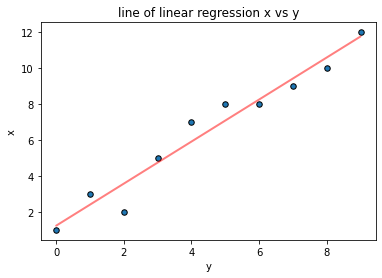

In [12]:
x = df.x
y = df.y

plt.scatter(x, y, s=30, linewidths=1, edgecolor='black')
plt.title('line of linear regression x vs y')
plt.xlabel('y')
plt.ylabel('x')
plt.plot(x, B0 + B1*x, c = 'r', linewidth=2, alpha=0.5, solid_capstyle='round')
plt.show()
